In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/Users/hrithickkanagaraj/Documents/Programming /ML/Damage_classification/mobile_resale_synthetic_dataset_v2.csv')
df.sample(5)

,Brand,Ram,Storage,Phone_age,Body_broken,Result
1365,Xiaomi,12,128GB,5,False,0.348
915,Redmi,12,64GB,2,False,0.566
589,Samsung,16,128GB,1,False,0.736
1043,Oneplus,12,128GB,6,False,0.288
407,Samsung,6,512GB,6,False,0.339


In [3]:
df['Storage'] = df['Storage'].str.replace('GB', '').astype(int)
display(df.head())

,Brand,Ram,Storage,Phone_age,Body_broken,Result
0,Apple,4,64,1,True,0.610
1,Apple,4,64,1,False,0.710
2,Apple,4,64,2,True,0.538
3,Apple,4,64,2,False,0.638
4,Apple,4,64,3,True,0.466


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1488 entries, 0 to 1487
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Brand        1488 non-null   object 
 1   Ram          1488 non-null   int64  
 2   Storage      1488 non-null   int64  
 3   Phone_age    1488 non-null   int64  
 4   Body_broken  1488 non-null   bool   
 5   Result       1488 non-null   float64
dtypes: bool(1), float64(1), int64(3), object(1)
memory usage: 59.7+ KB


In [5]:
df.describe()

,Ram,Storage,Phone_age,Result
count,1488.000000,1488.000000,1488.000000,1488.000000
mean,10.500000,551.225806,3.500000,0.481012
std,5.639471,619.656848,1.708399,0.158962
min,4.000000,32.000000,1.000000,0.050000
25%,6.000000,128.000000,2.000000,0.366750
50%,8.000000,256.000000,3.500000,0.482000
75%,12.000000,1024.000000,5.000000,0.596000
max,24.000000,2048.000000,6.000000,0.950000


In [6]:
df1 = pd.get_dummies(df, columns=['Brand'], drop_first=True)
display(df1.head())

,Ram,Storage,Phone_age,Body_broken,Result,Brand_Oneplus,Brand_Redmi,Brand_Samsung,Brand_Xiaomi
0,4,64,1,True,0.610,False,False,False,False
1,4,64,1,False,0.710,False,False,False,False
2,4,64,2,True,0.538,False,False,False,False
3,4,64,2,False,0.638,False,False,False,False
4,4,64,3,True,0.466,False,False,False,False


In [7]:
X = df1.drop(columns=["Result"])
y = df1["Result"]


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    shuffle=True
)


In [9]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

kf = KFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

cv_scores = cross_val_score(
    model,
    X_train,
    y_train,
    cv=kf,
    scoring="neg_mean_absolute_error"
)

mae_scores = -cv_scores

print("CV MAE scores:", mae_scores)
print("Mean CV MAE:", mae_scores.mean())


CV MAE scores: [0.01717151 0.02080754 0.02092143 0.02089162 0.02084185]
Mean CV MAE: 0.02012678991596636


In [10]:
model.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Random Forest Regressor")
print("Test MAE:", mae)
print("Test RMSE:", rmse)
print("Test R²:", r2)


Random Forest Regressor
Test MAE: 0.01727728187919454
Test RMSE: 0.02329768676407688
Test R²: 0.979909397319002


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression")
print("MAE:", mae_lr)
print("RMSE:", rmse_lr)
print("R²:", r2_lr)


Linear Regression
MAE: 0.019785564683107985
RMSE: 0.028128286060970818
R²: 0.9707144151588675


In [13]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost")
print("MAE:", mae_xgb)
print("RMSE:", rmse_xgb)
print("R²:", r2_xgb)


XGBoost
MAE: 0.005352052705999988
RMSE: 0.007165407004287633
R²: 0.9980995822023209


In [14]:
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=5, shuffle=True, random_state=42)

lr_cv = cross_val_score(
    lr,
    X_train,
    y_train,
    cv=kf,
    scoring="neg_mean_absolute_error"
)

print("LR CV MAE:", -lr_cv.mean())


LR CV MAE: 0.01902755801101928


In [15]:
xgb_cv = cross_val_score(
    xgb,
    X_train,
    y_train,
    cv=kf,
    scoring="neg_mean_absolute_error"
)

print("XGB CV MAE:", -xgb_cv.mean())


XGB CV MAE: 0.005749006209553792


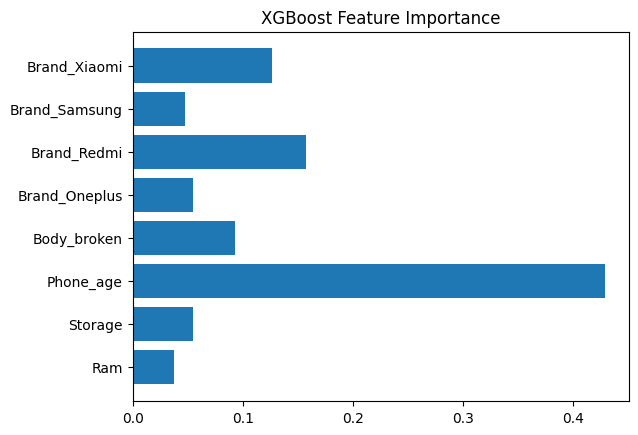

In [16]:
import matplotlib.pyplot as plt

xgb.feature_importances_
plt.barh(X.columns, xgb.feature_importances_)
plt.title("XGBoost Feature Importance")
plt.show()


In [17]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb.fit(X_train, y_train)


,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'reg:squarederror'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,0.8
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes 

In [18]:
import pickle

with open("xgboost_resale_model.pkl", "wb") as f:
    pickle.dump(xgb, f)

In [19]:
import pickle

with open("xgboost_resale_model.pkl", "rb") as f:
    xgb_loaded = pickle.load(f)

array([0.14917275, 0.33494288, 0.46557024, 0.38491368, 0.6839803 ],
      dtype=float32)

In [23]:
xgb_loaded.predict([[4, 64, 1, 1, 0, 0, 0, 0]])
# [[Ram, Storage, Phone_age, Body_broken, Brand_oneplus, Brand_Redmi, Brand_Samsung, Brand_Xiaomi]]
# 2D Array

array([0.61148393], dtype=float32)